In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

---
# Load dataset

In [49]:
# Download the data
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/emrearapcic-uevak/.cache/kagglehub/datasets/uciml/sms-spam-collection-dataset/versions/1


In [50]:
import os.path

spam_data = pd.read_csv(os.path.join(path, "spam.csv"), encoding='latin-1')
spam_data.rename(columns={'Unnamed: 2': 'Mistake_1', "Unnamed: 3" : 'Mistake_2', "Unnamed: 4" : 'Mistake_3'}, inplace=True)
spam_data.head()

,v1,v2,Mistake_1,Mistake_2,Mistake_3
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [51]:
spam_data['v2'] = spam_data[['v2', 'Mistake_1', 'Mistake_2', 'Mistake_3']].fillna(value="").agg(', '.join, axis=1)
spam_data.rename(columns={'v1' : 'target', 'v2' : 'sms'}, inplace=True)
spam_data.dropna(axis='columns', how='any', inplace=True)

---
# Feature analysis

<Axes: xlabel='target', ylabel='count'>

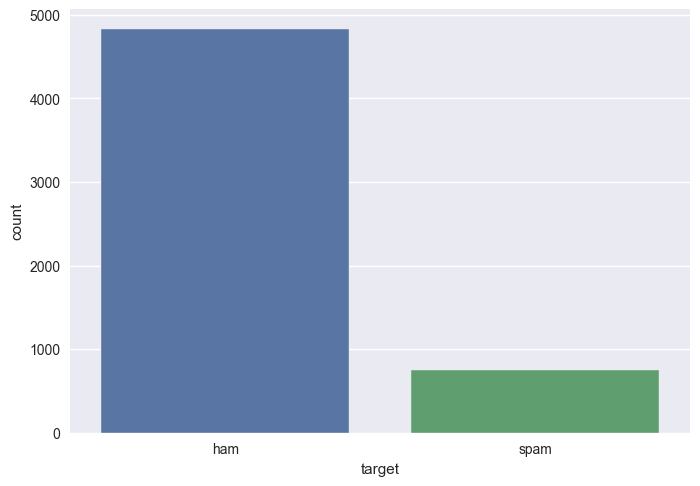

In [52]:
sns.countplot(data=spam_data, x="target", hue="target")

([<matplotlib.patches.Wedge at 0x11ee36990>,
 [Text(-1.0038715425384215, 0.4497131597824666, 'ham'),
  Text(1.0038714746336121, -0.4497133113628473, 'spam')],
 [Text(-0.547566295930048, 0.24529808715407267, '86.6%'),
  Text(0.5475662588910611, -0.24529816983428032, '13.4%')])

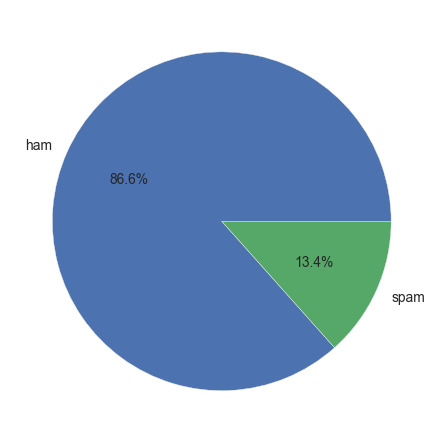

In [53]:
spam_data_count = spam_data['target'].value_counts()
plt.pie(x=spam_data_count, autopct="%1.1f%%", labels=spam_data_count.index.values)